In [2]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


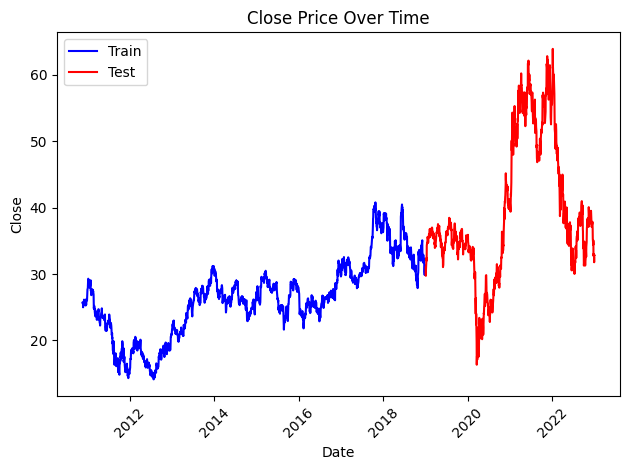

In [6]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 7.442993507604682  Average Fitness = 2.2348588582151314
Generation 2: Best fitness = 7.442993507604682  Average Fitness = 3.1304291116577962
Generation 3: Best fitness = 7.442993507604682  Average Fitness = 3.8647946078715103
Generation 4: Best fitness = 7.442993507604682  Average Fitness = 4.004849669476349
Generation 5: Best fitness = 7.442993507604682  Average Fitness = 4.317187504166883
Generation 6: Best fitness = 7.706620472119408  Average Fitness = 5.100310947544903
Generation 7: Best fitness = 7.706620472119408  Average Fitness = 4.833277649010319
Generation 8: Best fitness = 9.296315737698947  Average Fitness = 5.045380563877616
Generation 9: Best fitness = 9.296315737698947  Average Fitness = 5.117854985638723
Generation 10: Best fitness = 9.296315737698947  Average Fitness = 4.936816202234186
Island 0 Migration -Left island 3 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Right is

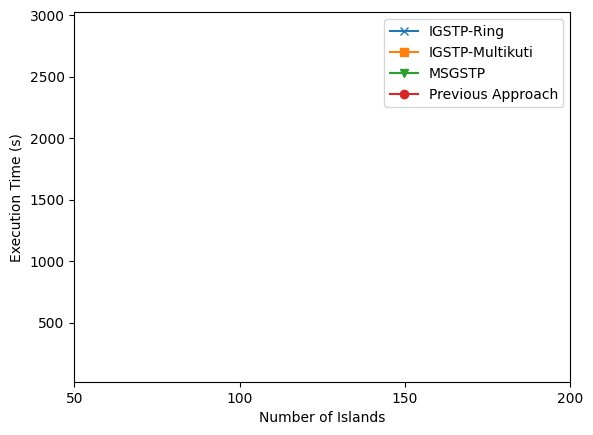

In [ ]:
import pickle

import matplotlib.pyplot as plt

num_island = [ 4, 6, 8, 10]
evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]

# Initialize dictionaries
fitness_values = {strategy: {size: [] for size in num_island} for strategy in evolve_strategy}
speed_values = {strategy: {size: [] for size in num_island} for strategy in evolve_strategy}


for strategy in evolve_strategy:
    for size in num_island:
        for j in range(5):
            start = time.time()
            ga = IslandGGA(data=data.train_data, num_islands=size, m_iter=10, num_iter=40, pSize=100,
                           r_cross=0.6, r_mut=0.1, strategies=data.strategies, evolve_strategy=strategy)
            ga.evolve()
            end = time.time()
            processing_time = end - start
            speed_values[strategy][size].append(processing_time)
            fitness_values[strategy][size].append(ga.globalBest.fitness_value)

# The data will be saved after the loop finishes
with open('num_island_fitness_values.pkl', 'wb') as f:
    pickle.dump(fitness_values, f)
with open('num_island_speed_values.pkl', 'wb') as f:
    pickle.dump(speed_values, f)
# Plot the speed of the algorithm against the population size for each evolution strategy
line_styles = {
    "gga": "o-",          # Previous Approach
    "ring": "x-",    # Replace "strategy2" with the actual strategy names
    "multikuti": "s-",    # Replace "strategy3" with the actual strategy names
    "master_slave":"v-"
}
          
for strategy in evolve_strategy:
    if strategy in line_styles:
        if strategy == 'gga':
            l = "Previous Approach" 
        elif strategy =='ring':
            l= "IGSTP-Ring"
        elif strategy == "multikuti":
            l= "IGSTP-Multikuti"
        else:
            l= "MSGSTP"
        plt.plot(num_island, [sum(speed_values[strategy][size]) / len(speed_values[strategy][size]) for size in num_island], line_styles[strategy], label=l)

plt.xlabel('Number of Islands')
plt.ylabel('Execution Time (s)')
#plt.title('Speed of Genetic Algorithm with Different Population Sizes and Evolution Strategies')
plt.legend()

# Set x-axis limits and ticks
plt.xlim(50, 200)  # Adjust these limits according to your data
plt.xticks(range(50, 201, 50))  # This will set ticks at intervals of 50 from 50 to 300

plt.show()

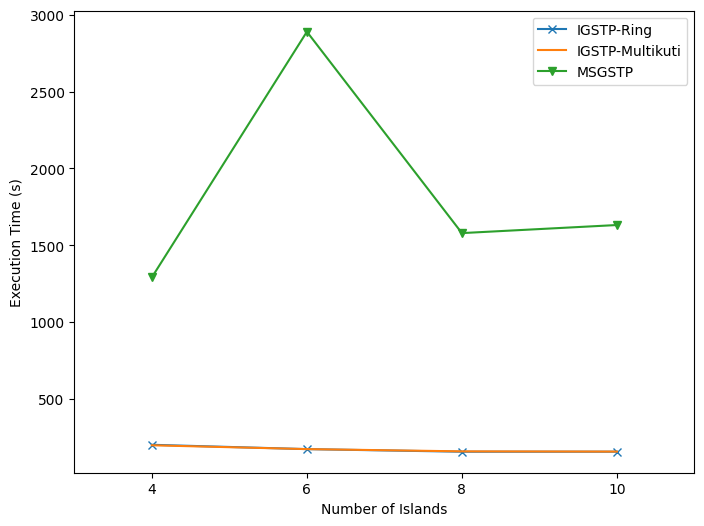

In [6]:

# Load speed_values from the pickle file
import pickle
with open("num_island_speed_values.pkl", "rb") as f:
    speed_values = pickle.load(f)
line_styles = {
    "gga": "o-",          
    "ring": "x-",    
    "multikuti": "-",    
    "master_slave": "v-"
}
num_island = [ 4, 6, 8, 10]
evolve_strategy = ["ring", "multikuti", "master_slave"]
# Plotting
plt.figure(figsize=(8, 6))

for strategy in evolve_strategy:
    if strategy in line_styles:
        label_map = {
            "gga": "Previous Approach",
            "ring": "IGSTP-Ring",
            "multikuti": "IGSTP-Multikuti",
            "master_slave": "MSGSTP"
        }
        l = label_map[strategy]

        avg_speed = [sum(speed_values[strategy][size]) / len(speed_values[strategy][size]) for size in num_island]
        plt.plot(num_island, avg_speed, line_styles[strategy], label=l)

plt.xlabel("Number of Islands")
plt.ylabel("Execution Time (s)")
plt.legend()
#plt.grid(True)

# Adjust x-axis limits to match data
plt.xlim(3, 11)
plt.xticks(num_island)  # Set ticks to match the actual population sizes

plt.show()


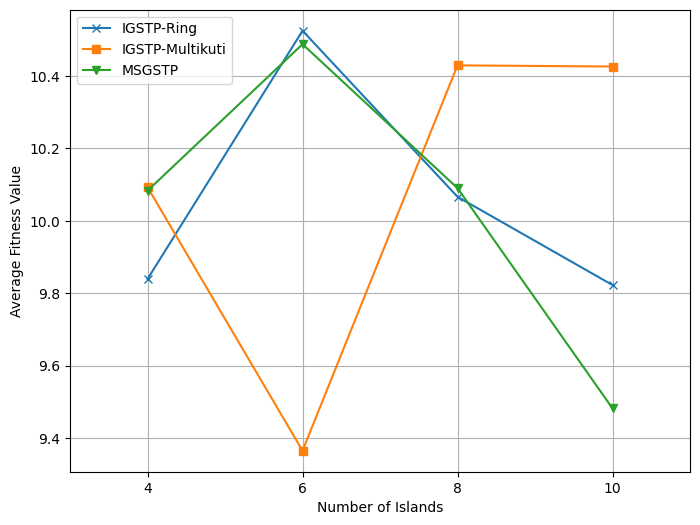

In [17]:

# Load speed_values from the pickle file
with open("num_island_fitness_values.pkl", "rb") as f:
    fitness_values = pickle.load(f)
line_styles = {
    "gga": "o-",          
    "ring": "x-",    
    "multikuti": "s-",    
    "master_slave": "v-"
}
num_island = [ 4, 6, 8, 10]
evolve_strategy = ["ring", "multikuti", "master_slave"]
# Plotting
plt.figure(figsize=(8, 6))

for strategy in evolve_strategy:
    if strategy in line_styles:
        label_map = {
            "gga": "Previous Approach",
            "ring": "IGSTP-Ring",
            "multikuti": "IGSTP-Multikuti",
            "master_slave": "MSGSTP"
        }
        l = label_map[strategy]

        avg_fitness = [sum(fitness_values[strategy][size]) / len(fitness_values[strategy][size]) for size in num_island]
        plt.plot(num_island, avg_fitness, line_styles[strategy], label=l)

plt.xlabel("Number of Islands")
plt.ylabel("Average Fitness Value")
plt.legend()
plt.grid(True)

# Adjust x-axis limits to match data
plt.xlim(3, 11)
plt.xticks(num_island)  # Set ticks to match the actual population sizes

plt.show()